# Import and Clean Data

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file_dir='C://Users/Ian/Desktop/Misc_Projects/Sales_Tax_Analysis/Sales_Tax_Collections_by_State.csv'

df = pd.read_csv(file_dir)

pd.options.display.float_format = '{:.2f}'.format

df.head()

,state,month,year,tax type,value,fips state,numeric month,note,id
0,Florida,July,2019,motor fuel,241299325.00,12,7,NaN,12_2019_7
1,Alabama,October,2022,motor fuel,80850005.00,1,10,NaN,1_2022_10
2,Alaska,October,2022,motor fuel,NaN,2,10,NaN,2_2022_10
3,Arizona,October,2022,motor fuel,67962955.00,4,10,NaN,4_2022_10
4,Arkansas,October,2022,motor fuel,47025345.00,5,10,NaN,5_2022_10


In [3]:
df['note'].describe()

count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: note, dtype: float64

In [4]:
df['tax type'].describe()

count           2193
unique             1
top       motor fuel
freq            2193
Name: tax type, dtype: object

In [5]:
# Drop the redundant "note" column which is blank throughout the entire dataset
# Drop the redundant "tax type" column since every tax is based on motor fuel
df_v1 = df.drop(['note','tax type'], axis=1)

In [6]:
# Drop rows with null values in the 'value' column
df_v2 = df_v1[df_v1['value'].notna()]
df_v2.head()

,state,month,year,value,fips state,numeric month,id
0,Florida,July,2019,241299325.00,12,7,12_2019_7
1,Alabama,October,2022,80850005.00,1,10,1_2022_10
3,Arizona,October,2022,67962955.00,4,10,4_2022_10
4,Arkansas,October,2022,47025345.00,5,10,5_2022_10
5,California,October,2022,759581000.00,6,10,6_2022_10


In [7]:
# Create a national df once data has been cleaned
nat_df = df_v2

nat_df.head()

,state,month,year,value,fips state,numeric month,id
0,Florida,July,2019,241299325.00,12,7,12_2019_7
1,Alabama,October,2022,80850005.00,1,10,1_2022_10
3,Arizona,October,2022,67962955.00,4,10,4_2022_10
4,Arkansas,October,2022,47025345.00,5,10,5_2022_10
5,California,October,2022,759581000.00,6,10,6_2022_10


# Exploratory Analysis

### Identify how Ohio compares to the national averages

In [8]:
# Acquire averages on a national level
nat_mean = nat_df['value'].mean()
nat_med = nat_df['value'].median()

print(f'National Mean: ${nat_mean:,.2f}')
print(f'National Median: ${nat_med:,.2f}')

National Mean: $96,118,634.59
National Median: $61,096,398.00


In [9]:
ohio_df = nat_df.loc[nat_df['state']=='Ohio']

ohio_df.head()

,state,month,year,value,fips state,numeric month,id
1346,Ohio,April,2019,158966637.00,39,4,39_2019_4
1347,Ohio,April,2020,155490571.00,39,4,39_2020_4
1348,Ohio,April,2021,220850767.00,39,4,39_2021_4
1349,Ohio,April,2022,215434820.00,39,4,39_2022_4
1350,Ohio,August,2019,244895720.00,39,8,39_2019_8


In [10]:
oh_mean = ohio_df['value'].mean()
oh_med = ohio_df['value'].median()

oh_mean_diff = oh_mean-nat_mean

print(f'Ohio Mean: ${oh_mean:,.2f}')
print(f'Ohio Median: ${oh_med:,.2f}')

print(f'\nOhio had ${oh_mean_diff:,.2f} compared to the national average.')

Ohio Mean: $212,794,264.88
Ohio Median: $219,103,371.00

Ohio had $116,675,630.29 compared to the national average.


### Identify if Ohio has any particular months which generate more revenue on average

In [11]:
ohio_df.head()

,state,month,year,value,fips state,numeric month,id
1346,Ohio,April,2019,158966637.00,39,4,39_2019_4
1347,Ohio,April,2020,155490571.00,39,4,39_2020_4
1348,Ohio,April,2021,220850767.00,39,4,39_2021_4
1349,Ohio,April,2022,215434820.00,39,4,39_2022_4
1350,Ohio,August,2019,244895720.00,39,8,39_2019_8


In [12]:
# Group the dataframe by month (currently alphabetical, not chronological)
oh_months = ohio_df.groupby(by='month',sort='numeric month')

oh_months.describe()

year                                                      value  \
          count    mean  std     min     25%     50%     75%     max count   
month                                                                        
April      4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
August     4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
December   3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00  3.00   
February   3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00  3.00   
January    3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00  3.00   
July       4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
June       4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
March      3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00  3.00   
May        4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
November   3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00  3.00   
October    3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00  3.00   
September  4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   

                        ... fips state       numeric month                   \
                  mean  ...        75%   max         count  mean  std   min   
month                   ...                                                   
April     187685698.75  ...      39.00 39.00          4.00  4.00 0.00  4.00   
August    233616698.00  ...      39.00 39.00          4.00  8.00 0.00  8.00   
December  213679647.67  ...      39.00 39.00          3.00 12.00 0.00 12.00   
February  195337738.00  ...      39.00 39.00          3.00  2.00 0.00  2.00   
January   204649463.33  ...      39.00 39.00          3.00  1.00 0.00  1.00   
July      228462911.50  ...      39.00 39.00          4.00  7.00 0.00  7.00   
June      206898478.25  ...      39.00 39.00          4.00  6.00 0.00  6.00   
March     213785765.00  ...      39.00 39.00          3.00  3.00 0.00  3.00   
May       203715848.25  ...      39.00 39.00          4.00  5.00 0.00  5.00   
November  214065533.00  ...      39.00 39.00          3.00 11.00 0.00 11.00   
October   229421898.33  ...      39.00 39.00          3.00 10.00 0.00 10.00   
September 220755112.50  ...      39.00 39.00          4.00  9.00 0.00  9.00   

                                   
            25%   50%   75%   max  
month                              
April      4.00  4.00  4.00  4.00  
August     8.00  8.00  8.00  8.00  
December  12.00 12.00 12.00 12.00  
February   2.00  2.00  2.00  2.00  
January    1.00  1.00  1.00  1.00  
July       7.00  7.00  7.00  7.00  
June       6.00  6.00  6.00  6.00  
March      3.00  3.00  3.00  3.00  
May        5.00  5.00  5.00  5.00  
November  11.00 11.00 11.00 11.00  
October   10.00 10.00 10.00 10.00  
September  9.00  9.00  9.00  9.00  

[12 rows x 32 columns]

In [13]:
# Group the dataframe by month and find the mean value of each group
oh_month_avg = oh_months.mean()['value']
oh_month_avg.index

# Print findings for each individual month
for i in range(len(oh_month_avg)):
    current_month_avg=oh_month_avg[i]
    current_month_diff=current_month_avg-oh_mean
    print(f'The average value in {oh_month_avg.index[i]} was ${current_month_avg:,.0f}.')
    print(f"This is a difference of ${current_month_diff:,.0f} compared to Ohio's mean")
    print(f'\n')

The average value in April was $187,685,699.
This is a difference of $-25,108,566 compared to Ohio's mean


The average value in August was $233,616,698.
This is a difference of $20,822,433 compared to Ohio's mean


The average value in December was $213,679,648.
This is a difference of $885,383 compared to Ohio's mean


The average value in February was $195,337,738.
This is a difference of $-17,456,527 compared to Ohio's mean


The average value in January was $204,649,463.
This is a difference of $-8,144,802 compared to Ohio's mean


The average value in July was $228,462,912.
This is a difference of $15,668,647 compared to Ohio's mean


The average value in June was $206,898,478.
This is a difference of $-5,895,787 compared to Ohio's mean


The average value in March was $213,785,765.
This is a difference of $991,500 compared to Ohio's mean


The average value in May was $203,715,848.
This is a difference of $-9,078,417 compared to Ohio's mean


The average value in November was $2

In [14]:
# Group the dataframe by month (chronological)
oh_months = ohio_df.groupby(by='numeric month',sort='numeric month')

oh_months.describe()

year                                                       \
              count    mean  std     min     25%     50%     75%     max   
numeric month                                                              
1              3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00   
2              3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00   
3              3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00   
4              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
5              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
6              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
7              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
8              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
9              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
10             3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00   
11             3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00   
12             3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00   

              value               ...                           fips state  \
              count         mean  ...          75%          max      count   
numeric month                     ...                                        
1              3.00 204649463.33  ... 208676461.00 214989659.00       3.00   
2              3.00 195337738.00  ... 201119514.50 206463132.00       3.00   
3              3.00 213785765.00  ... 220560755.00 220888649.00       3.00   
4              4.00 187685698.75  ... 216788806.75 220850767.00       4.00   
5              4.00 203715848.25  ... 230865076.75 230880436.00       4.00   
6              4.00 206898478.25  ... 225058366.25 229171061.00       4.00   
7              4.00 228462911.50  ... 235098706.00 240259633.00       4.00   
8              4.00 233616698.00  ... 239655634.25 244895720.00       4.00   
9              4.00 220755112.50  ... 224328989.75 226591721.00       4.00   
10             3.00 229421898.33  ... 233234895.00 240831539.00       3.00   
11             3.00 214065533.00  ... 219873643.50 220795099.00       3.00   
12             3.00 213679647.67  ... 218739059.00 219254554.00       3.00   

                                                        
               mean  std   min   25%   50%   75%   max  
numeric month                                           
1             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
2             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
3             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
4             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
5             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
6             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
7             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
8             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
9             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
10            39.00 0.00 39.00 39.00 39.00 39.00 39.00  
11            39.00 0.00 39.00 39.00 39.00 39.00 39.00  
12            39.00 0.00 39.00 39.00 39.00 39.00 39.00  

[12 rows x 24 columns]

In [15]:
# Group the dataframe by month and find the mean value of each group
oh_month_avg = oh_months.mean()['value']
oh_month_avg.index

# Create a dataframe using the information
for i in [1,12]:
    d = {'Months':['January','February','March','April','May','June','July','August','September','October','November','December'],
        'Average Tax Per Month':oh_month_avg,
        'Difference From Total Average': oh_month_avg - oh_mean}
    oh_avg_df = pd.DataFrame(data=d, index=[1,2,3,4,5,6,7,8,9,10,11,12])

oh_avg_df.set_index('Months', inplace=True)

In [16]:
oh_avg_df

,Average Tax Per Month,Difference From Total Average
Months,,
January,204649463.33,-8144801.55
February,195337738.00,-17456526.88
March,213785765.00,991500.12
April,187685698.75,-25108566.13
May,203715848.25,-9078416.63
June,206898478.25,-5895786.63
July,228462911.50,15668646.62
August,233616698.00,20822433.12
September,220755112.50,7960847.62


### Identify any sharp dips/rises in Ohio dataset

In [17]:
# Sort the Ohio data chronologically
ohio_df_chron = ohio_df.sort_values(['year','numeric month'])

# Reset index for ease of access in future for loop
ohio_df_chron.reset_index(inplace=True)

ohio_df_chron.tail()

,index,state,month,year,value,fips state,numeric month,id
37,1960,Ohio,May,2022,230880436.00,39,5,39_2022_5
38,2060,Ohio,June,2022,223687468.00,39,6,39_2022_6
39,2059,Ohio,July,2022,217328691.00,39,7,39_2022_7
40,2161,Ohio,August,2022,231650607.00,39,8,39_2022_8
41,2162,Ohio,September,2022,216906050.00,39,9,39_2022_9


In [18]:
# Drop redundant columns from filtering to specifically Ohio
ohio_df_chron.drop(labels=['index','state', 'fips state'], axis=1, inplace=True)

ohio_df_chron.head()

,month,year,value,numeric month,id
0,April,2019,158966637.00,4,39_2019_4
1,May,2019,170462947.00,5,39_2019_5
2,June,2019,163356424.00,6,39_2019_6
3,July,2019,240259633.00,7,39_2019_7
4,August,2019,244895720.00,8,39_2019_8


In [19]:
len(ohio_df_chron)

42

In [20]:
# Initialize a series of 'differences' to eventually create new column in dataframe
# Initialize with '0' for first difference for null value in first month
differences = [0]

for i in range(1,42):
    current_val = ohio_df_chron['value'][i]
    prev_val = ohio_df_chron['value'][i-1]
    difference = current_val - prev_val
    differences.append(difference)
    
differences

[0,
 11496310.0,
 -7106523.0,
 76903209.0,
 4636087.0,
 -18303999.0,
 14239818.0,
 -20036440.0,
 -1540545.0,
 -4264895.0,
 -8526527.0,
 -6227347.0,
 -44745214.0,
 27169482.0,
 28718907.0,
 11505965.0,
 -2873399.0,
 -4063593.0,
 5847972.0,
 -19346593.0,
 1111513.0,
 -6965357.0,
 -12821283.0,
 37114464.0,
 -37882.0,
 10009190.0,
 -1688896.0,
 4207336.0,
 4530542.0,
 -14334193.0,
 2063505.0,
 -6686063.0,
 -728624.0,
 -15860301.0,
 -6587366.0,
 24456964.0,
 -4798041.0,
 15445616.0,
 -7192968.0,
 -6358777.0,
 14321916.0,
 -14744557.0]

In [21]:
# Create new column with these monthly differences
ohio_df_chron['monthly difference'] = differences

In [22]:
# Verify differences were appended correctly
ohio_df_chron.head()

,month,year,value,numeric month,id,monthly difference
0,April,2019,158966637.00,4,39_2019_4,0.00
1,May,2019,170462947.00,5,39_2019_5,11496310.00
2,June,2019,163356424.00,6,39_2019_6,-7106523.00
3,July,2019,240259633.00,7,39_2019_7,76903209.00
4,August,2019,244895720.00,8,39_2019_8,4636087.00


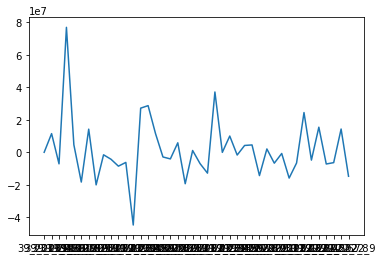

In [27]:
# Create a basic plot to visualize the month trend
plt.plot(ohio_df_chron['id'],ohio_df_chron['monthly difference'])

# Create a horiz line to show +/- revenue

# Create vert lines to show separate years


plt.show()

In [26]:
# Create separate plots for 19-20, 20-21, 21-22